In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import skfuzzy
from skfuzzy import control as ctrl
import warnings

In [3]:
warnings.filterwarnings('ignore')

# Carga de datos

In [6]:
datos = pd.read_csv('fuzzydata.csv', sep = ';')
datos.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   57782  Female   34                1         39.0                   1   
1  286811  Female   55                1         28.0                   0   
2  117823    Male   39                1         28.0                   1   
3  213992    Male   28                1         50.0                   1   
4  324756  Female   24                1         10.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    1-2 Year             No           38244                 124.0      146  
1   > 2 Years            Yes           37577                 122.0      109  
2    1-2 Year             No           24578                  26.0       63  
3    1-2 Year             No           40507                   8.0      129  
4    < 1 Year            Yes           36783                 152.0      201

In [9]:
datos = datos[['Age', 'Vintage', 'Annual_Premium']]
datos.rename(columns = {'Age':'Edad', 'Annual_Premium':'Prima', 'Vintage':'Antigüedad'}, inplace = True)
datos.head()

Edad  Antigüedad  Prima
0    34         146  38244
1    55         109  37577
2    39          63  24578
3    28         129  40507
4    24         201  36783

In [11]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64663 entries, 0 to 64662
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Edad        64663 non-null  int64
 1   Antigüedad  64663 non-null  int64
 2   Prima       64663 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


# Edad

Hacemos un describe para entender cuales son el máximo y el mínimo

In [10]:
datos.Edad.describe()

count    64663.000000
mean        37.999149
std         15.244715
min         20.000000
25%         24.000000
50%         35.000000
75%         48.000000
max         84.000000
Name: Edad, dtype: float64

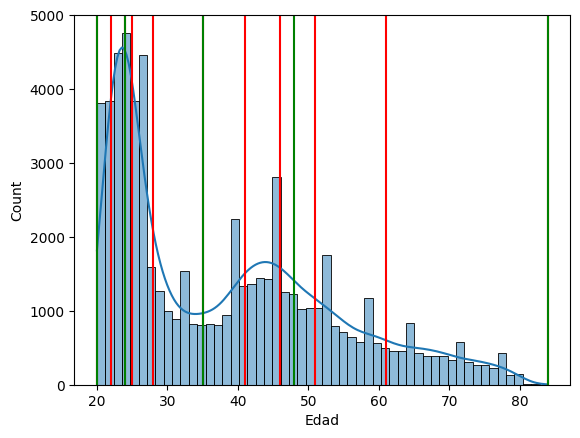

In [16]:
percentil_Edad = []
for i in range(0, 110, 10):
    percentil_Edad.append(np.percentile(datos.Edad, i))
cuartil_Edad = []
for i in [0, 0.25, 0.5, 0.75, 1]:
    cuartil_Edad.append(np.quantile(datos.Edad, i))

sb.histplot(data = datos, x = 'Edad', kde = True)
for i in range(len(percentil_Edad)):
    plt.axvline(percentil_Edad[i], color = 'red')
for i in range(len(cuartil_Edad)):
    plt.axvline(cuartil_Edad[i], color = 'green')
    
plt.show()

In [18]:
print('Valor del percentil: ', percentil_Edad)
print('Valor del cuartil: ',cuartil_Edad)

Valor del percentil:  [20.0, 22.0, 24.0, 25.0, 28.0, 35.0, 41.0, 46.0, 51.0, 61.0, 84.0]
Valor del cuartil:  [20, 24.0, 35.0, 48.0, 84]


In [19]:
px.box(data_frame = datos, y = 'Edad')

# Antigüedad

In [21]:
datos.Antigüedad.describe()

count    64663.000000
mean       154.967524
std         83.441555
min         10.000000
25%         83.000000
50%        155.000000
75%        227.000000
max        299.000000
Name: Antigüedad, dtype: float64

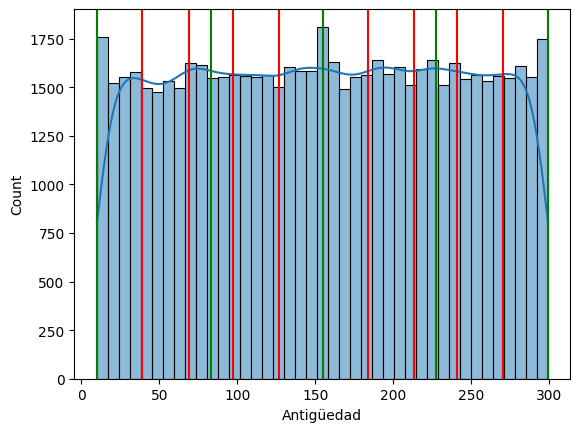

In [22]:
percentil_Antigüedad = []
for i in range(0, 110, 10):
    percentil_Antigüedad.append(np.percentile(datos.Antigüedad, i))
cuartil_Antigüedad = []
for i in [0, 0.25, 0.5, 0.75, 1]:
    cuartil_Antigüedad.append(np.quantile(datos.Antigüedad, i))

sb.histplot(data = datos, x = 'Antigüedad', kde = True)
for i in range(len(percentil_Antigüedad)):
    plt.axvline(percentil_Antigüedad[i], color = 'red')
for i in range(len(cuartil_Antigüedad)):
    plt.axvline(cuartil_Antigüedad[i], color = 'green')
    
plt.show()

In [23]:
print('Valor del percentil: ', percentil_Antigüedad)
print('Valor del cuartil: ',cuartil_Antigüedad)

Valor del percentil:  [10.0, 39.0, 69.0, 97.0, 127.0, 155.0, 184.0, 213.0, 241.0, 270.0, 299.0]
Valor del cuartil:  [10, 83.0, 155.0, 227.0, 299]


In [24]:
px.box(data_frame = datos, y = 'Antigüedad')

# Prima

In [25]:
datos.Prima.describe()

count    64663.000000
mean     35611.029878
std      10119.138312
min      10004.000000
25%      28393.500000
50%      33832.000000
75%      41037.000000
max      75000.000000
Name: Prima, dtype: float64

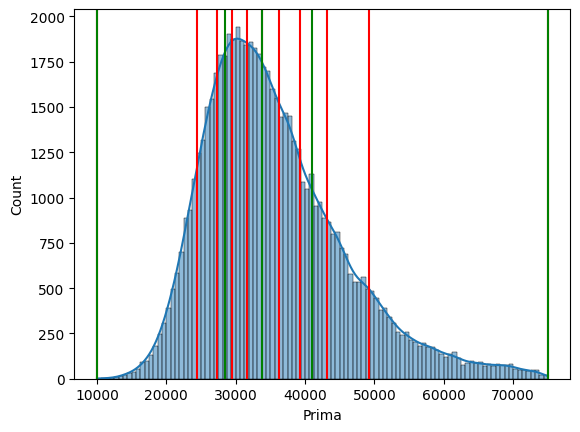

In [26]:
percentil_Prima = []
for i in range(0, 110, 10):
    percentil_Prima.append(np.percentile(datos.Prima, i))
cuartil_Prima = []
for i in [0, 0.25, 0.5, 0.75, 1]:
    cuartil_Prima.append(np.quantile(datos.Prima, i))

sb.histplot(data = datos, x = 'Prima', kde = True)
for i in range(len(percentil_Prima)):
    plt.axvline(percentil_Prima[i], color = 'red')
for i in range(len(cuartil_Prima)):
    plt.axvline(cuartil_Prima[i], color = 'green')
    
plt.show()

In [27]:
px.box(data_frame = datos, y = 'Prima')

In [29]:
print('Valor del percentil: ', percentil_Prima)
print('Valor del cuartil: ', cuartil_Prima)

Valor del percentil:  [10004.0, 24460.0, 27262.4, 29483.0, 31622.800000000003, 33832.0, 36317.0, 39218.0, 43154.20000000001, 49285.20000000001, 75000.0]
Valor del cuartil:  [10004, 28393.5, 33832.0, 41037.0, 75000]


# Motor de inferencia borrosa

1. Declarar universos del discurso

In [48]:
#Edad
edad = ctrl.Antecedent(np.arange(datos.Edad.min(), datos.Edad.max() + 1, 1), 'edad')

#Antigüedad
antiguedad = ctrl.Antecedent(np.arange(datos.Antigüedad.min(), datos.Antigüedad.max() + 1, 1), 'antiguedad')

#Prima
prima = ctrl.Consequent(np.arange(datos.Prima.min(), datos.Prima.max() + 1, 1), 'prima')

2. Fuzzificar antecedentes y consecuente

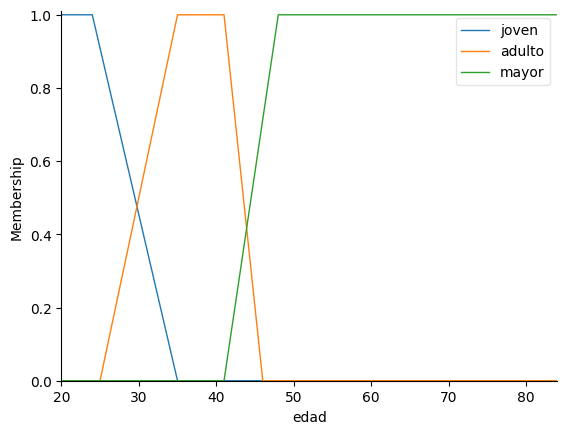

In [49]:
#Edad
edad['joven'] = skfuzzy.trapmf(edad.universe, [cuartil_Edad[0], cuartil_Edad[0], 
                                               cuartil_Edad[1], cuartil_Edad[2]])

edad['adulto'] = skfuzzy.trapmf(edad.universe, [percentil_Edad[3], percentil_Edad[5], 
                                                percentil_Edad[6], percentil_Edad[7]])

edad['mayor'] = skfuzzy.trapmf(edad.universe, [percentil_Edad[6], cuartil_Edad[3], 
                                               cuartil_Edad[4], cuartil_Edad[4]])

edad.view()

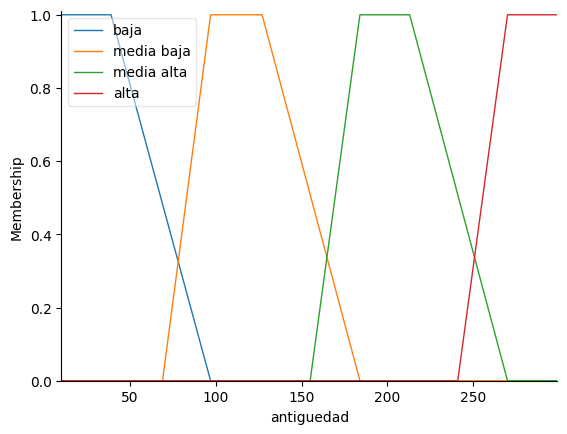

In [50]:
#Antigüedad
antiguedad['baja'] = skfuzzy.trapmf(antiguedad.universe, [percentil_Antigüedad[0], percentil_Antigüedad[0],
                                                         percentil_Antigüedad[1], percentil_Antigüedad[3]])

antiguedad['media baja'] = skfuzzy.trapmf(antiguedad.universe, [percentil_Antigüedad[2], percentil_Antigüedad[3],
                                                         percentil_Antigüedad[4], percentil_Antigüedad[6]])

antiguedad['media alta'] = skfuzzy.trapmf(antiguedad.universe, [percentil_Antigüedad[5], percentil_Antigüedad[6],
                                                         percentil_Antigüedad[7], percentil_Antigüedad[9]])

antiguedad['alta'] = skfuzzy.trapmf(antiguedad.universe, [percentil_Antigüedad[8], percentil_Antigüedad[9],
                                                         percentil_Antigüedad[10], percentil_Antigüedad[10]])

antiguedad.view()

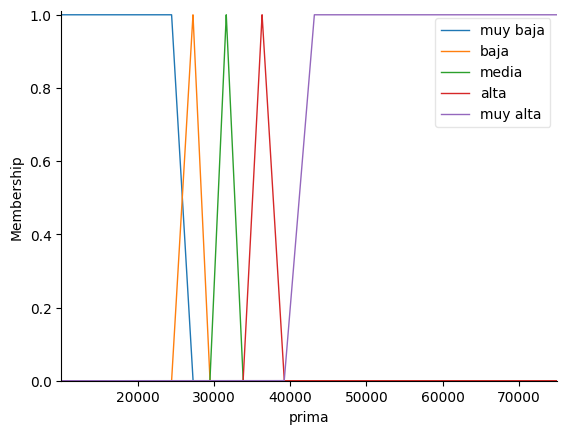

In [51]:
#Prima
prima['muy baja'] = skfuzzy.trapmf(prima.universe, [cuartil_Prima[0], cuartil_Prima[0], 
                                                    percentil_Prima[1], percentil_Prima[2]])

prima['baja'] = skfuzzy.trimf(prima.universe, [percentil_Prima[1], percentil_Prima[2], 
                                               percentil_Prima[3]])

prima['media'] = skfuzzy.trimf(prima.universe, [percentil_Prima[3], percentil_Prima[4], 
                                                percentil_Prima[5]])

prima['alta'] = skfuzzy.trimf(prima.universe, [percentil_Prima[5], percentil_Prima[6], 
                                               percentil_Prima[7]])

prima['muy alta'] = skfuzzy.trapmf(prima.universe, [percentil_Prima[7], percentil_Prima[8], 
                                                    cuartil_Prima[4], cuartil_Prima[4]])

prima.view()

3. Crear base de conocimiento

In [52]:
regla1 = ctrl.Rule(edad['joven'] & antiguedad['baja'], prima['muy alta'])
regla2 = ctrl.Rule(edad['joven'] & antiguedad['media baja'], prima['alta'])
regla3 = ctrl.Rule(edad['joven'] & antiguedad['media alta'], prima['media'])
regla4 = ctrl.Rule(edad['joven'] & antiguedad['alta'], prima['media'])
regla5 = ctrl.Rule(edad['adulto'] & antiguedad['baja'], prima['media'])
regla6 = ctrl.Rule(edad['adulto'] & antiguedad['media baja'], prima['baja'])
regla7 = ctrl.Rule(edad['adulto'] & antiguedad['media alta'], prima['muy baja'])
regla8 = ctrl.Rule(edad['adulto'] & antiguedad['alta'], prima['muy baja'])
regla9 = ctrl.Rule(edad['mayor'] & antiguedad['baja'], prima['muy alta'])
regla10 = ctrl.Rule(edad['mayor'] & antiguedad['media baja'], prima['alta'])
regla11 = ctrl.Rule(edad['mayor'] & antiguedad['media alta'], prima['media'])
regla12 = ctrl.Rule(edad['mayor'] & antiguedad['alta'], prima['baja'])

4. Activar el motor de inferencia

In [53]:
calculoPrima = ctrl.ControlSystem([regla1, regla2, regla3, regla4,
                                  regla5, regla6, regla7, regla8,
                                  regla9, regla10, regla11, regla12,])

5. Utilizar el SIB

In [55]:
calcularPrima = ctrl.ControlSystemSimulation(calculoPrima)
calcularPrima.input['edad'] = 40
calcularPrima.input['antiguedad'] = 120
calcularPrima.compute()
calcularPrima.output['prima']

27068.46665918474

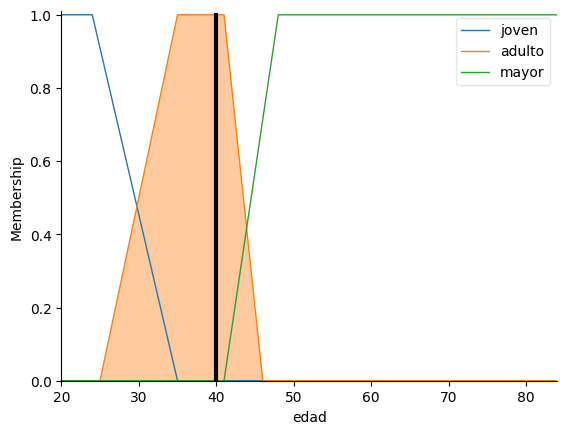

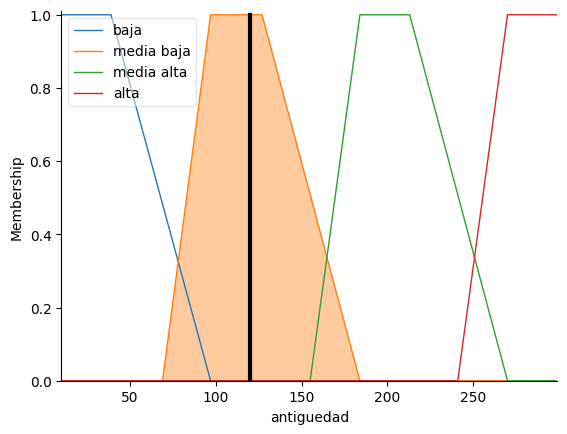

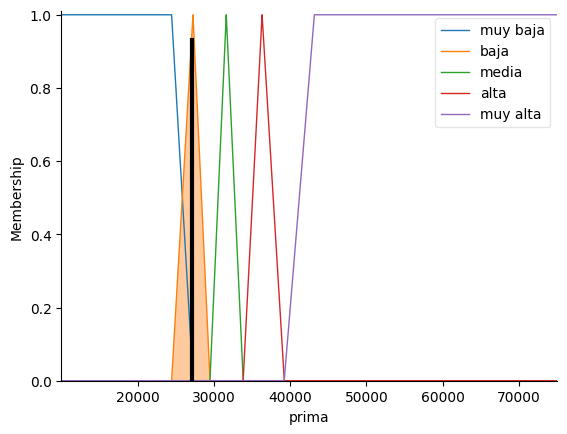

In [56]:
edad.view(sim = calcularPrima)
antiguedad.view(sim = calcularPrima)
prima.view(sim = calcularPrima)